# importing libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

from scipy import stats
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [2]:
cd M:\IIST\SEM 2\STATISTICAL MODELS AND ANALYSIS\Statistical Models and Simulation Presentation

M:\IIST\SEM 2\STATISTICAL MODELS AND ANALYSIS\Statistical Models and Simulation Presentation


# Data set 

In [3]:
payroll = pd.read_csv("data.csv")
payroll

C:\Users\Bharadwaj\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,$57.32,$119684.16,$55484.82,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$45921.05,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$54746.99,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,$58.76,$122690.88,$52753.23,...,Supervisory Blue Collar Unit,98,3987,NaN,$18144.43,$1248.19,$0.00,$19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


# Data cleaning 

In [4]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)
payroll.replace(0,'NaN')

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,$47911.51,$13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/3156.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274156,274357,2016,Zoo,8702.0,1569372100,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,...,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274157,274358,2016,Zoo,8702.0,583720037,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$24195.60,...,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274158,274359,2016,Zoo,8702.0,2795932236,Zoo Veterinarian II,Part Time,$50.86,$106198.29,$4475.79,...,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274159,274360,2016,Zoo,8702.0,3627379422,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,...,Professional Medical,87,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf


In [5]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

C:\Users\Bharadwaj\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
payroll

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274156,274357,2016,Zoo,8702.0,1569372100,Zoo Veterinarian II,Part Time,$49.50,103356.00,0.00,...,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274157,274358,2016,Zoo,8702.0,583720037,Zoo Veterinarian II,Part Time,$49.50,103356.00,24195.60,...,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274158,274359,2016,Zoo,8702.0,2795932236,Zoo Veterinarian II,Part Time,$50.86,106198.29,4475.79,...,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf
274159,274360,2016,Zoo,8702.0,3627379422,Zoo Veterinarian II,Part Time,$49.50,103356.00,0.00,...,Professional Medical,87,2367,2,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2367.pdf


# Remove outliers 

In [7]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)


In [8]:
pay_plot = payroll[['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']]

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

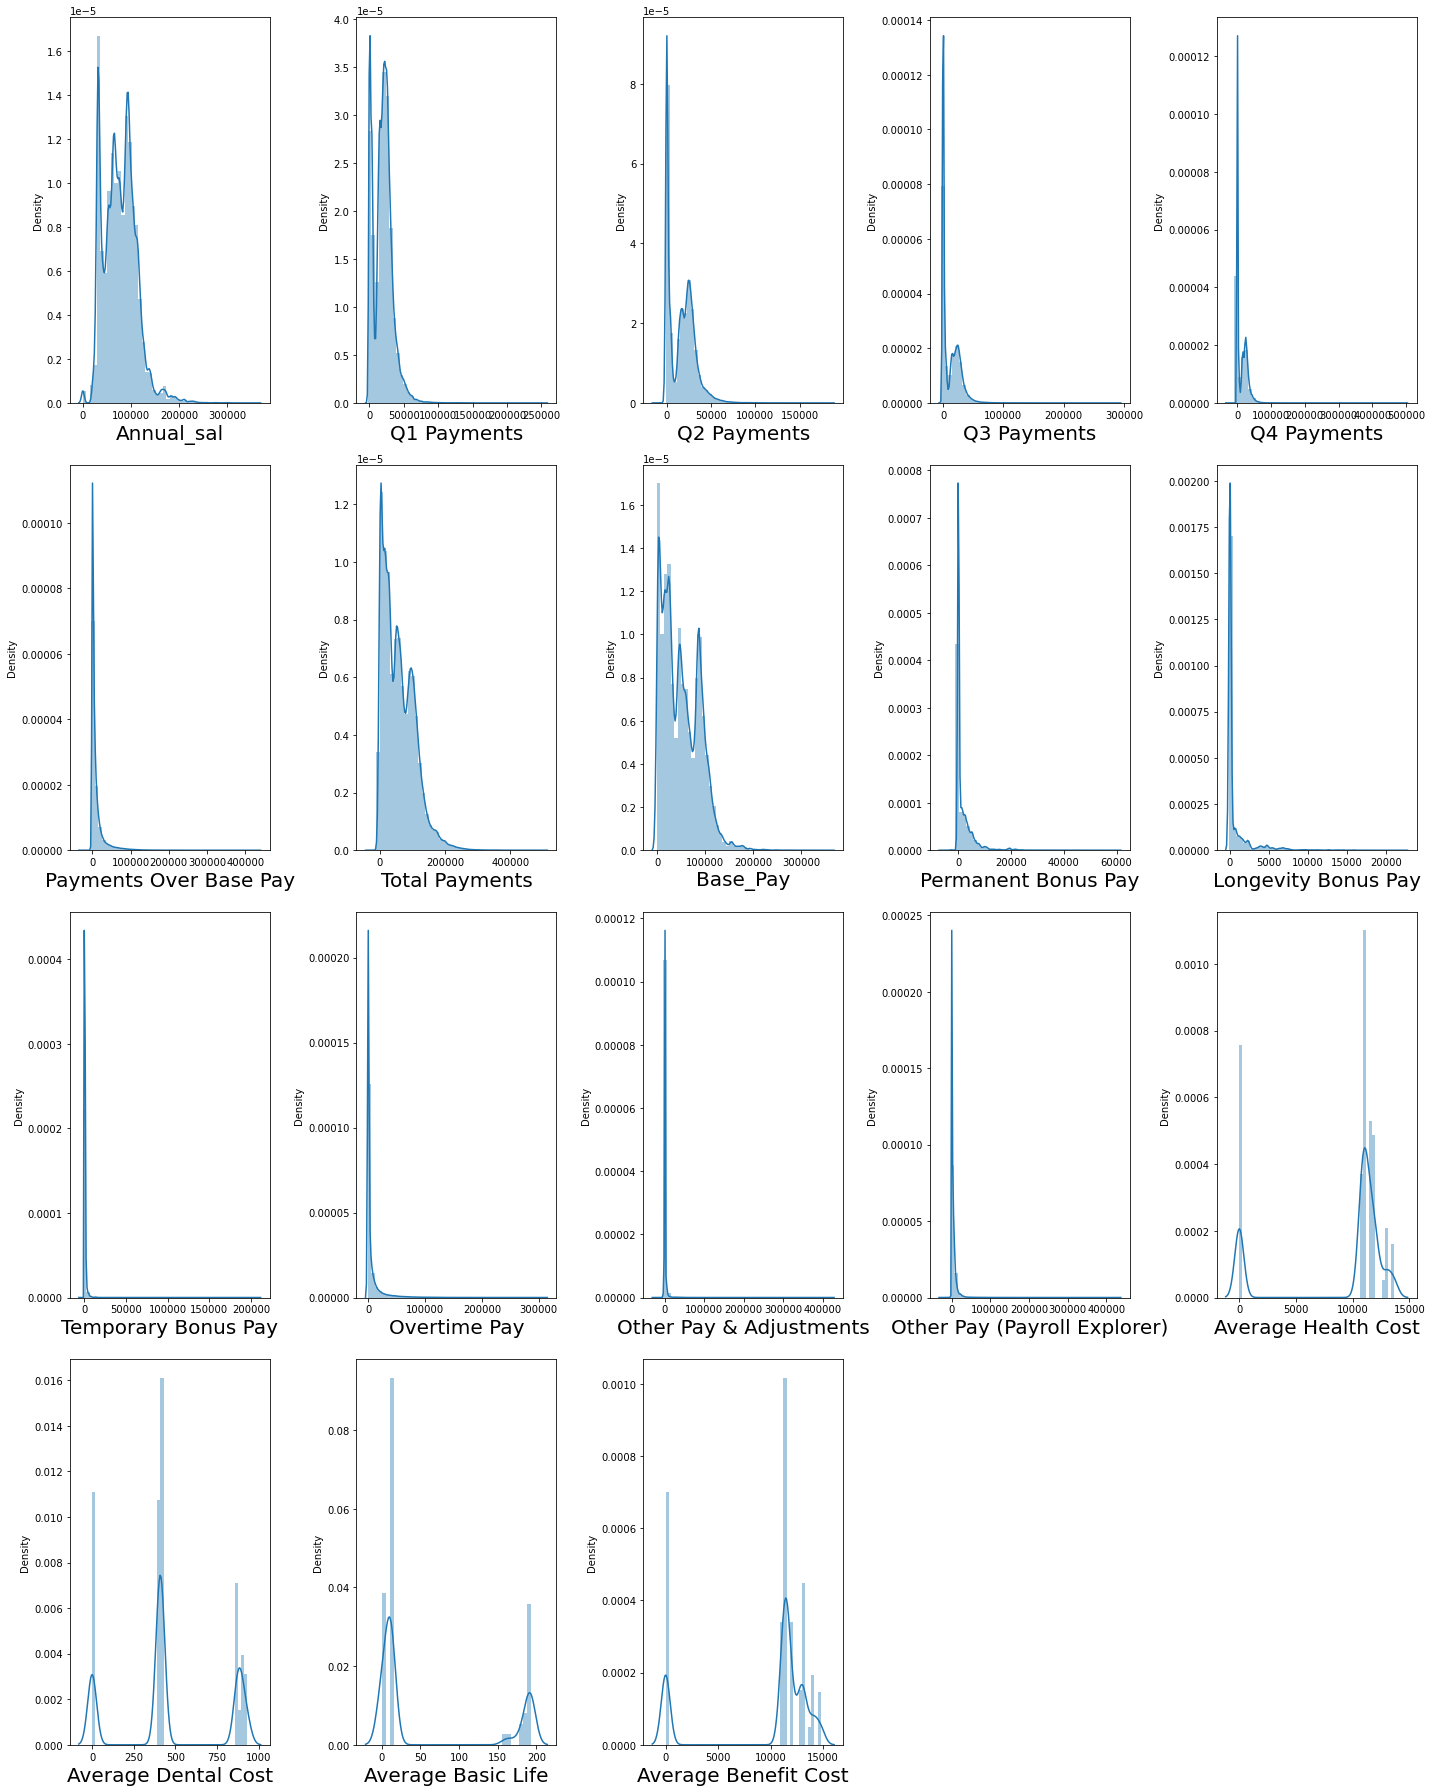

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in pay_plot:
    if plotnumber<=20 :
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(pay_plot[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# creating different samples from the population

In [10]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2013 = payroll[payroll.Year ==2013]
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2016=payroll[payroll.Year ==2016]


In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

        Row ID  Year          Department Title  Payroll Department  \
32      114364  2015                     Aging               302.0   
33      114365  2015                     Aging               302.0   
34      114366  2015                     Aging               302.0   
35      114367  2015                     Aging               302.0   
44      114368  2015                     Aging               302.0   
...        ...   ...                       ...                 ...   
237230    8370  2013      Emergency Management              1301.0   
237231    8371  2013      Emergency Management              1301.0   
237232    8375  2013  Employee Relations Board              2909.0   
237233    8376  2013  Employee Relations Board              2909.0   
237234    8377  2013  Employee Relations Board              2909.0   

       Record Number                        Job_title Employment Type  \
32         743477525             Administrative Clerk       Part Time   
33        158

<AxesSubplot:title={'center':'MEAN OF DIFFERENT YEARS '}, ylabel='Year'>

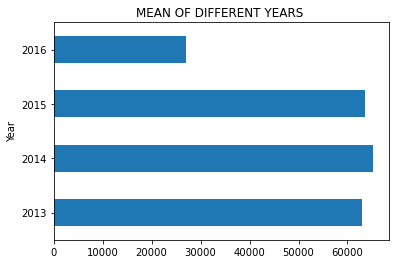

In [12]:
frames = [payroll_2015,payroll_2014,payroll_2016,payroll_2013]
result = pd.concat(frames)
print(result)
df_basepay = result.groupby("Year").agg([np.mean, np.std])
pay = df_basepay['Base_Pay']


pay.head()
pay.plot(kind = "barh", y = "mean", legend = False,
            title = "MEAN OF DIFFERENT YEARS ")


In [13]:
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2013_elec = payroll_2013[payroll_2013.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']

In [14]:
q1 = payroll_2014_elec['Base_Pay'].quantile(0.90)
# we are removing the top 10% data from the Pregnancies column
payroll_2014_elec_cleaned =(payroll_2014_elec[payroll_2014_elec['Base_Pay']<q1])
skew2014= (np.array(np.sqrt(np.log(payroll_2014_elec_cleaned['Base_Pay']))))
q2 = payroll_2015_elec['Base_Pay'].quantile(0.97)
# we are removing the top 3% data from the Pregnancies column
payroll_2015_elec_cleaned =(payroll_2015_elec[payroll_2015_elec['Base_Pay']<q2])
skew2015= (np.array(np.sqrt(np.log(payroll_2015_elec_cleaned['Base_Pay']))))
q3 = payroll_2013_elec['Base_Pay'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
payroll_2013_elec_cleaned =(payroll_2013_elec[payroll_2013_elec['Base_Pay']<q3])

skew2013= (np.array((np.sqrt(np.log(payroll_2013_elec_cleaned['Base_Pay'])))))

q4 = payroll_2016_elec['Base_Pay'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
payroll_2016_elec_cleaned =(payroll_2016_elec[payroll_2016_elec['Base_Pay']<q4])

skew2016= (np.array((np.sqrt(np.log(payroll_2016_elec_cleaned['Base_Pay'])))))

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\pandas\c

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarni

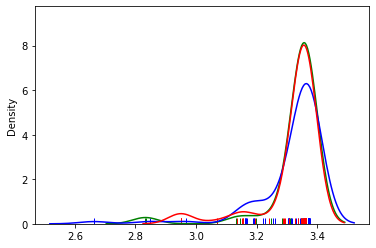

In [15]:
#scalar = StandardScaler()
#pay2014_scaled = scalar.fit_transform((skew2014).reshape(-1,1))


sns.distplot(skew2014, hist=False, rug=True,color='g')
sns.distplot(skew2015,hist=False, rug=True, color='b')
sns.distplot(skew2013,hist=False, rug=True,color='r')
#sns.distplot(skew2016,hist=False, rug=True, color ='c' )
plt.show()

In [16]:
a = len(pd.DataFrame(skew2014))
a

67

In [17]:
b = len(pd.DataFrame(skew2015))
b

83

In [18]:
c = len(pd.DataFrame(skew2016))
c

156

In [19]:

sam_1 = pd.DataFrame(skew2014).sample(frac=0.04)

#print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sam_2 = pd.DataFrame(skew2015).sample(frac=0.06)

#print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sam_3 =pd.DataFrame(skew2013).sample(frac=0.07)


#The means from three different samples are compared using ANOVA using statistics learnt in the class

In [20]:
n1 = len(sam_1)
n2 = len(sam_2)
n3 = len(sam_3)
print(n1,n2,n3)
N = n1+n2+n3
listN=[n1,n2,n3]
print(N)

3 5 6
14


In [21]:
x1_bar =float(sam_1.mean())
x2_bar =float(sam_2.mean())
x3_bar =float( sam_3.mean())
print('x1_bar is ',x1_bar)
print('x2_bar is', x2_bar)
print('x3_bar is ', x3_bar)

x1_bar is  3.3591044569371795
x2_bar is 3.366226746863127
x3_bar is  3.2771715178486502


In [22]:
x1_square_sum=0
for i in sam_1:
    x1_square_sum = x1_square_sum + (i-x1_bar)**2
x2_square_sum=0
for i in sam_2:
    x2_square_sum = x2_square_sum + (i-x2_bar)**2
x3_square_sum=0
for i in sam_3:
    x3_square_sum = x3_square_sum + (i-x3_bar)**2


In [23]:
grand_mean= (x1_bar*n1 +  x2_bar*n2 + x3_bar*n3)/N

In [24]:
bss = n1*((x1_bar-grand_mean)**2) + n2*((x2_bar-grand_mean)**2) + n3*((x3_bar- grand_mean)**2)
print(bss)

0.025680002627842136


In [25]:
wss = x1_square_sum+ x2_square_sum + x3_square_sum
print(wss)

33.354918421310366


In [26]:
f = (bss/wss)* ((N-len(listN))/(len(listN)-1))
f


0.004234458398881704

In [39]:
import scipy 
scipy.stats.f.ppf(1-.01, 2, 11)

7.205713350457377

In [27]:
F_2_11_001 = 7.12 # for p=0.01
F_2_11_005 = 3.98 # for p=0.05
F_2_11_010 = 7.12 # for p=0.10
F_table = {'F_2_11_001' : 7.12 , 'F_2_11_005' : 3.98 , 'F_2_11_010': 7.12 }

In [28]:
for i in F_table.keys():
    if f > F_table[i]:
        print('reject the null hypothesis : average salary of 3 years of electricians is different with {} significance level'.format(i))
    else:
        print('accept  the null hypothesis : average salary of 3 years of electricians is same  with {} significance level'.format(i))

accept  the null hypothesis : average salary of 3 years of electricians is same  with F_2_11_001 significance level
accept  the null hypothesis : average salary of 3 years of electricians is same  with F_2_11_005 significance level
accept  the null hypothesis : average salary of 3 years of electricians is same  with F_2_11_010 significance level


In [48]:
def ONEWAY_ANOVA(x,y,z):
    import scipy 

    sam_1 = pd.DataFrame(skew2014).sample(frac=x)

    #print("Sample Mean 2014 "+str(sample_elec_mean_2014))
    sam_2 = pd.DataFrame(skew2015).sample(frac=y)

    #print("Sample Mean 2015 "+str(sample_elec_mean_2015))
    sam_3 =pd.DataFrame(skew2013).sample(frac=z)
    
    n1 = len(sam_1)
    n2 = len(sam_2)
    n3 = len(sam_3)
    print("sam_1 : {} , sam_2 : {} , sam_3 : {} ".format(n1,n2,n3))
    N = n1+n2+n3
    listN=[n1,n2,n3]
    print("Total Number of Sample from all the groups : ",N)

    x1_bar =float(sam_1.mean())
    x2_bar =float(sam_2.mean())
    x3_bar =float( sam_3.mean())
    print('x1_bar is ',x1_bar)
    print('x2_bar is', x2_bar)
    print('x3_bar is ', x3_bar)
    
    x1_square_sum=0
    for i in sam_1:
        x1_square_sum = x1_square_sum + (i-x1_bar)**2
    x2_square_sum=0
    for i in sam_2:
        x2_square_sum = x2_square_sum + (i-x2_bar)**2
    x3_square_sum=0
    for i in sam_3:
        x3_square_sum = x3_square_sum + (i-x3_bar)**2
    grand_mean= (x1_bar*n1 +  x2_bar*n2 + x3_bar*n3)/N
    bss = n1*((x1_bar-grand_mean)**2) + n2*((x2_bar-grand_mean)**2) + n3*((x3_bar- grand_mean)**2)
    print("bss : ",bss)
    wss = x1_square_sum+ x2_square_sum + x3_square_sum
    print("wss",wss)
    f = (bss/wss)* ((N-len(listN))/(len(listN)-1))
    print("F_calculated : ",f)
    
    F_table = { "1%" : scipy.stats.f.ppf(1-.01, 2, N-3) , "5%" : scipy.stats.f.ppf(1-.05, 2, N-3) , "10%" : scipy.stats.f.ppf(1-.1, 2, N-3)}

    for i in F_table.keys():
        if f > F_table[i]:
            print('reject null hypothesis:average salary of 3 years of electricians is different with {} significance level'.format(i))
        else:
            print('accept null hypothesis:average salary of 3 years of electricians is same  with {} significance level'.format(i))


In [49]:
import numpy as np
x = np.random.randn()
ONEWAY_ANOVA(1,1,1)

sam_1 : 67 , sam_2 : 83 , sam_3 : 86 
Total Number of Sample from all the groups :  236
x1_bar is  3.3286495014506223
x2_bar is 3.3176649158738067
x3_bar is  3.318543665773604
bss :  0.005360040288697446
wss 33.099540059173535
F_calculated :  0.01886566074685342
accept null hypothesis:average salary of 3 years of electricians is same  with 1% significance level
accept null hypothesis:average salary of 3 years of electricians is same  with 5% significance level
accept null hypothesis:average salary of 3 years of electricians is same  with 10% significance level


In [54]:
import random
#random.uniform(start, stop)
x = random.uniform(0, 1)
y = random.uniform(0, 1)
z = random.uniform(0, 1)
ONEWAY_ANOVA(x,y,z)

sam_1 : 10 , sam_2 : 1 , sam_3 : 37 
Total Number of Sample from all the groups :  48
x1_bar is  3.3367386002402832
x2_bar is 3.227705294379683
x3_bar is  3.3346052964714588
bss :  0.011320584767813377
wss 32.67149843695563
F_calculated :  0.0077961884046214396
accept null hypothesis:average salary of 3 years of electricians is same  with 1% significance level
accept null hypothesis:average salary of 3 years of electricians is same  with 5% significance level
accept null hypothesis:average salary of 3 years of electricians is same  with 10% significance level


# Conclusion : Hence we conclude that , the result of accept hypothesis has been verified by two methods , i.e through mathematical modelling and using graph 